In [161]:
# ПОДКЛЮЧАЕМ БИБЛИОТЕКИ 
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
from dotenv import load_dotenv
from pathlib import Path

In [162]:
# ЗАГРУЖАЕМ ПЕРЕМЕННЫЕ ОКРУЖЕНИЯ
load_dotenv(dotenv_path='.env', encoding='utf-8-sig')

API_URL = os.getenv('API_URL')
DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')

START_DATE = DATE_BEGIN
END_DATE = DATE_END

print(f"API_URL: {API_URL}")
print(f"DATE_BEGIN: {DATE_BEGIN}")
print(f"DATE_END: {DATE_END}")

API_URL: https://data-charts-api.hexlet.app
DATE_BEGIN: 2023-03-01
DATE_END: 2023-09-01


In [163]:
# Создаем папку charts
charts_dir = Path.cwd() / 'charts'
charts_dir.mkdir(exist_ok=True)
print(f"Папка создана/проверена: {charts_dir}")

Папка создана/проверена: c:\projects\data-analytics-project-100\charts


In [164]:
# ФУНКЦИЯ ДЛЯ ПОЛУЧЕНИЯ ДАННЫХ ИЗ API
def get_api_data(endpoint, start_date, end_date):
    url = f"{API_URL}/{endpoint}?begin={start_date}&end={end_date}"
    print(f"Запрос: {url}")
    
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        
        df = pd.DataFrame(response.json())
        
        if df.empty:
            print(f"Внимание: Данные для {endpoint} пустые")
            return df
            
        if 'datetime' in df.columns:
            df['datetime'] = pd.to_datetime(df['datetime'])
            print(f"Успешно: {endpoint}: {len(df)} записей")
        
        return df
        
    except Exception as e:
        print(f"Ошибка при запросе {endpoint}: {e}")
        return None

# Запрос данных используя переменные окружения
print(f"\nЗагрузка данных за период {DATE_BEGIN} - {DATE_END}")
print("=" * 50)

visits_df = get_api_data('visits', DATE_BEGIN, DATE_END)
registrations_df = get_api_data('registrations', DATE_BEGIN, DATE_END)

# ВЫВОД ДАННЫХ
print("\n" + "="*50)
print("АНАЛИЗ ДАННЫХ")
print("="*50)

# Статистика визитов
if visits_df is not None and not visits_df.empty:
    print(f"\n ПОСЕЩЕНИЯ:")
    print(f"   Всего: {len(visits_df)} записей")
    print(f"   Период: {visits_df['datetime'].min().date()} - {visits_df['datetime'].max().date()}")
    print(f"   Уникальных пользователей: {visits_df['visit_id'].nunique()}")
    
    # Статистика по платформам
    print(f"   Распределение по платформам:")
    platform_stats = visits_df['platform'].value_counts()
    for platform, count in platform_stats.items():
        percentage = count / len(visits_df) * 100
        print(f"     {platform}: {count} ({percentage:.1f}%)")
    
    # Проверка ботов
    if 'user_agent' in visits_df.columns:
        bot_count = visits_df['user_agent'].str.contains('bot', case=False, na=False).sum()
        print(f"   Ботов (в user_agent): {bot_count}")
    
    # Быстрый просмотр данных
    print(f"\n   Пример данных (первые 2 строки):")
    print(visits_df[['datetime', 'platform', 'visit_id']].head(2).to_string())
else:
    print("\n ПОСЕЩЕНИЯ: Данные не загружены или пустые")

# Статистика регистраций
if registrations_df is not None and not registrations_df.empty:
    print(f"\n РЕГИСТРАЦИИ:")
    print(f"   Всего: {len(registrations_df)} записей")
    print(f"   Период: {registrations_df['datetime'].min().date()} - {registrations_df['datetime'].max().date()}")
    print(f"   Уникальных пользователей: {registrations_df['user_id'].nunique()}")
    
    # Статистика по платформам
    print(f"   Распределение по платформам:")
    platform_stats = registrations_df['platform'].value_counts()
    for platform, count in platform_stats.items():
        percentage = count / len(registrations_df) * 100
        print(f"     {platform}: {count} ({percentage:.1f}%)")
    
    # Статистика по типам регистрации
    print(f"   Типы регистрации:")
    type_stats = registrations_df['registration_type'].value_counts()
    for reg_type, count in type_stats.items():
        percentage = count / len(registrations_df) * 100
        print(f"     {reg_type}: {count} ({percentage:.1f}%)")
    
    # Быстрый просмотр данных
    print(f"\n   Пример данных (первые 2 строки):")
    print(registrations_df[['datetime', 'platform', 'user_id', 'registration_type']].head(2).to_string())
else:
    print("\nРЕГИСТРАЦИИ: Данные не загружены или пустые")

print("\n" + "="*50)


Загрузка данных за период 2023-03-01 - 2023-09-01
Запрос: https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01
Успешно: visits: 263459 записей
Запрос: https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01
Успешно: registrations: 21836 записей

АНАЛИЗ ДАННЫХ

 ПОСЕЩЕНИЯ:
   Всего: 263459 записей
   Период: 2023-03-01 - 2023-08-31
   Уникальных пользователей: 146085
   Распределение по платформам:
     web: 236301 (89.7%)
     android: 13972 (5.3%)
     bot: 7382 (2.8%)
     ios: 5804 (2.2%)
   Ботов (в user_agent): 7382

   Пример данных (первые 2 строки):
             datetime platform                              visit_id
0 2023-03-01 10:36:22      web  1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1 2023-03-01 06:25:00      web  f149f542-e935-4870-9734-6b4501eaf614

 РЕГИСТРАЦИИ:
   Всего: 21836 записей
   Период: 2023-03-01 - 2023-08-31
   Уникальных пользователей: 21836
   Распределение по платформам:
     android: 10582 (48.5%)
     web: 687

In [ ]:
# ОБРАБОТКА ВИЗИТОВ
if visits_df is not None and not visits_df.empty:
    
    # Фильтрация ботов по User-Agent
    visits_df['is_bot'] = visits_df['user_agent'].str.contains('bot', case=False, na=False)
    
    bot_visits = visits_df[visits_df['is_bot']]
    human_visits = visits_df[~visits_df['is_bot']].copy()
    
    # Вывод статистики
    print(f"\nСтатистика визитов:")
    print(f"Всего визитов: {len(visits_df)}")
    print(f"Визиты ботов (по user_agent): {len(bot_visits)} ({len(bot_visits)/len(visits_df)*100:.1f}%)")
    print(f"Визиты людей: {len(human_visits)} ({len(human_visits)/len(visits_df)*100:.1f}%)")
    
    # Берем последний визит для каждого visit_id
    human_visits_sorted = human_visits.sort_values('datetime')
    last_visits = human_visits_sorted.drop_duplicates('visit_id', keep='last').copy()  # ДОБАВИЛИ .copy()
    
    # Подготовка для группировки
    last_visits.loc[:, 'date_group'] = last_visits['datetime'].dt.date
    
    filtered_visits = last_visits[last_visits['platform'].isin(['web', 'ios', 'android'])].copy()
    
    # Группировка по дате и платформе
    visits_grouped = filtered_visits.groupby(['date_group', 'platform']).size().reset_index(name='visits')
    
    # Сортировка
    visits_grouped = visits_grouped.sort_values(['date_group', 'platform']).reset_index(drop=True)
    
    # Вывод данных
    print("\nГруппированные визиты (первые 6 строк):")
    print(visits_grouped.head(6))
    print(f"\nВсего групп: {len(visits_grouped)}")
    print(f"Сумма всех визитов: {visits_grouped['visits'].sum()}")


Статистика визитов:
Всего визитов: 263459
Визиты ботов (по user_agent): 7382 (2.8%)
Визиты людей: 256077 (97.2%)

Группированные визиты (первые 6 строк):
   date_group platform  visits
0  2023-03-01  android      75
1  2023-03-01      ios      22
2  2023-03-01      web     279
3  2023-03-02  android      67
4  2023-03-02      ios      31
5  2023-03-02      web     515

Всего групп: 552
Сумма всех визитов: 138703


In [166]:
# ОБРАБОТКА РЕГИСТРАЦИЙ
if registrations_df is not None and not registrations_df.empty:
    
    # Подготовка для группировки
    registrations_df['date_group'] = registrations_df['datetime'].dt.date
    filtered_regs = registrations_df[registrations_df['platform'].isin(['web', 'ios', 'android'])]
    
    # Группировка по дате и платформе
    regs_grouped = filtered_regs.groupby(['date_group', 'platform']).size().reset_index(name='registrations')
    
    # Сортировка
    regs_grouped = regs_grouped.sort_values(['date_group', 'platform']).reset_index(drop=True)
    
    # Вывод данных
    print("\nГруппированные регистрации:")
    print(regs_grouped.head(20))
    print(f"\nВсего групп: {len(regs_grouped)}")
    regs_grouped = regs_grouped.sort_values(['date_group', 'platform']).reset_index(drop=True)


Группированные регистрации:
    date_group platform  registrations
0   2023-03-01  android             61
1   2023-03-01      ios             18
2   2023-03-01      web              8
3   2023-03-02  android             59
4   2023-03-02      ios             24
5   2023-03-02      web             23
6   2023-03-03  android             22
7   2023-03-03      ios             34
8   2023-03-03      web             51
9   2023-03-04  android             77
10  2023-03-04      ios             43
11  2023-03-04      web             39
12  2023-03-05  android             54
13  2023-03-05      ios             13
14  2023-03-05      web             48
15  2023-03-06  android            109
16  2023-03-06      ios             43
17  2023-03-06      web             78
18  2023-03-07  android             50
19  2023-03-07      ios             19

Всего групп: 552


In [168]:
# ОБЪЕДИНЕНИЕ И РАСЧЕТ КОНВЕРСИИ
if 'visits_grouped' in locals() and 'regs_grouped' in locals():
    # Объединение
    merged_df = pd.merge(visits_grouped, regs_grouped, on=['date_group', 'platform'], how='outer').fillna(0)
    
    # Расчет конверсии
    merged_df['conversion'] = merged_df.apply(
        lambda r: round(r['registrations'] / r['visits'] * 100, 10) if r['visits'] > 0 else 0,
        axis=1
    )
    
    # Преобразуем типы
    merged_df['visits'] = merged_df['visits'].astype(int)
    merged_df['registrations'] = merged_df['registrations'].astype(int)
    
    # Преобразуем даты в timestamp
    merged_df['date_group'] = pd.to_datetime(merged_df['date_group']).astype('int64') // 10**6
    merged_df['date_group'] = merged_df['date_group'].astype('int64')
    
    # Сортировка
    final_df = merged_df.sort_values(['date_group', 'platform']).reset_index(drop=True)
    
    # Сохранение
    final_df.to_json('./conversion.json')
    print("Файл conversion.json сохранен")
    
    # Проверка
    print("\nПроверка первых 3 строк final_df:")
    print(final_df.head(3))
    print(f"Тип date_group: {final_df['date_group'].dtype}")

Файл conversion.json сохранен

Проверка первых 3 строк final_df:
      date_group platform  visits  registrations  conversion
0  1677628800000  android      75             61   81.333333
1  1677628800000      ios      22             18   81.818182
2  1677628800000      web     279              8    2.867384
Тип date_group: int64


In [ ]:
# ПОДРОБНЫЙ РАСЧЕТ КОНВЕРСИЙ
if 'visits_grouped' in locals() and 'regs_grouped' in locals():
    print("КОНВЕРСИЯ ПО ПЛАТФОРМАМ:")
    print("-" * 50)
    
    # Суммируем по платформам
    visits_sum = visits_grouped.groupby('platform')['visits'].sum()
    regs_sum = regs_grouped.groupby('platform')['registrations'].sum()
    
    # Расчет для каждой платформы
    for platform in ['android', 'ios', 'web']:
        visits = visits_sum.get(platform, 0)
        regs = regs_sum.get(platform, 0)
        if visits > 0:
            conv = (regs / visits) * 100
            print(f"{platform}: {conv:.2f}% (визиты: {visits}, регистрации: {regs})")
    
    # Общая конверсия
    total_v = visits_sum.sum()
    total_r = regs_sum.sum()
    if total_v > 0:
        total_conv = (total_r / total_v) * 100
        print(f"\nСРЕДНЯЯ КОНВЕРСИЯ: {total_conv:.2f}%")
        print(f"Всего: визиты={total_v}, регистрации={total_r}")

КОНВЕРСИЯ ПО ПЛАТФОРМАМ:
--------------------------------------------------
android: 75.74% (визиты: 13972, регистрации: 10582)
ios: 75.41% (визиты: 5804, регистрации: 4377)
web: 5.78% (визиты: 118927, регистрации: 6877)

СРЕДНЯЯ КОНВЕРСИЯ: 15.74%
Всего: визиты=138703, регистрации=21836


In [173]:
# ДОБАВЛЯЕМ ДАННЫЕ ПО РЕКЛАМНЫМ КОМПАНИЯМ
ads_df = pd.read_csv('./ads.csv')
ads_df['date'] = pd.to_datetime(ads_df['date'])
ads_df['date_group'] = (ads_df['date'].dt.floor('D').astype('int64') // 10**6).astype('int64')

# Группируем по дням
ads_grouped = ads_df.groupby('date_group').agg({
    'utm_campaign': 'first', 
    'cost': 'sum'
}).reset_index()

print("\nПроверка ads_grouped:")
print(ads_grouped.head())

print("\nПроверка final_df структуры:")
print(final_df.head())

# Объединяем с final_df по дате
ads_final = pd.merge(final_df, ads_grouped, on='date_group', how='left')

# Заполняем пропущенные значения
ads_final['utm_campaign'] = ads_final['utm_campaign'].fillna('none')
ads_final['cost'] = ads_final['cost'].fillna(0).astype(float)

# Пересчитываем conversion
ads_final['conversion'] = ads_final.apply(
    lambda r: round(r['registrations'] / r['visits'] * 100, 10) if r['visits'] > 0 else 0,
    axis=1
)

# Сортируем
ads_final = ads_final.sort_values(['date_group', 'platform']).reset_index(drop=True)

# Упорядочиваем колонки
ads_final = ads_final[['date_group', 'platform', 'visits', 'registrations', 'conversion', 'utm_campaign', 'cost']]

# Сохраняем
ads_final.to_json('./ads.json')

# Проверяем структуру
print("\nПроверка ads_final:")
print(ads_final.head())
print(f"Количество строк: {len(ads_final)}")
print(f"Тип date_group: {ads_final['date_group'].dtype}")


Проверка ads_grouped:
      date_group                utm_campaign  cost
0  1677628800000  advanced_algorithms_series   212
1  1677715200000  advanced_algorithms_series   252
2  1677801600000  advanced_algorithms_series   202
3  1677888000000  advanced_algorithms_series   223
4  1677974400000  advanced_algorithms_series   265

Проверка final_df структуры:
      date_group platform  visits  registrations  conversion
0  1677628800000  android      75             61   81.333333
1  1677628800000      ios      22             18   81.818182
2  1677628800000      web     279              8    2.867384
3  1677715200000  android      67             59   88.059701
4  1677715200000      ios      31             24   77.419355

Проверка ads_final:
      date_group platform  visits  registrations  conversion  \
0  1677628800000  android      75             61   81.333333   
1  1677628800000      ios      22             18   81.818182   
2  1677628800000      web     279              8    2.867384  

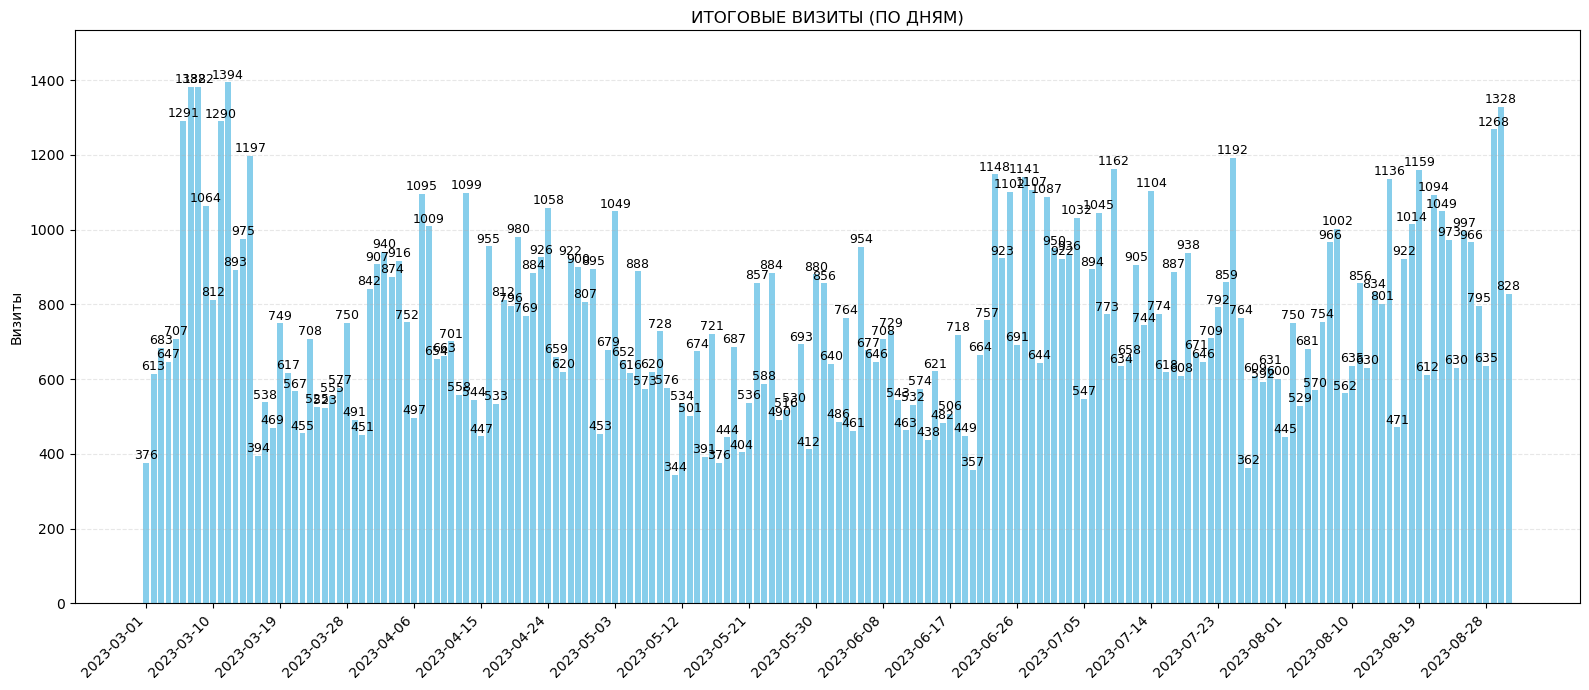

In [ ]:
# ГРАФИК ИТОГОВЫХ ВИЗИТОВ
plt.figure(figsize=(16, 7))

# Создаем временную дату для фильтрации
ads_final['date_group_dt'] = pd.to_datetime(ads_final['date_group'], unit='ms')

# Фильтруем даты
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)

# Суммируем визиты по дням
daily_visits = ads_final.groupby('date_group_dt')['visits'].sum().reset_index()

# Фильтруем по дате из переменных окружения
filtered_data = daily_visits[(daily_visits['date_group_dt'] >= filter_start_date) & 
                             (daily_visits['date_group_dt'] <= filter_end_date)].copy()

# Сортируем по дате
filtered_data = filtered_data.sort_values('date_group_dt')

# Форматируем даты для подписей
dates_formatted = filtered_data['date_group_dt'].dt.strftime('%Y-%m-%d')

# Строим столбчатую диаграмму
bars = plt.bar(range(len(filtered_data)), filtered_data['visits'], color='skyblue')

# Добавляем значения над столбцами
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 10,
             f'{int(bar.get_height())}', ha='center', fontsize=9)

plt.title(f'ИТОГОВЫЕ ВИЗИТЫ (ПО ДНЯМ)')
plt.ylabel('Визиты')

# Настройка осей
step = max(1, len(filtered_data) // 20)  # Примерно 20 меток
xticks_positions = list(range(0, len(filtered_data), step))
xticks_labels = [dates_formatted.iloc[i] for i in xticks_positions]
plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right')
plt.ylim(0, filtered_data['visits'].max() * 1.1)

# Добавляем сетку
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()

# Сохраняем и показываем график
plt.savefig('./charts/total_visits.png', dpi=300, bbox_inches='tight')
plt.show()

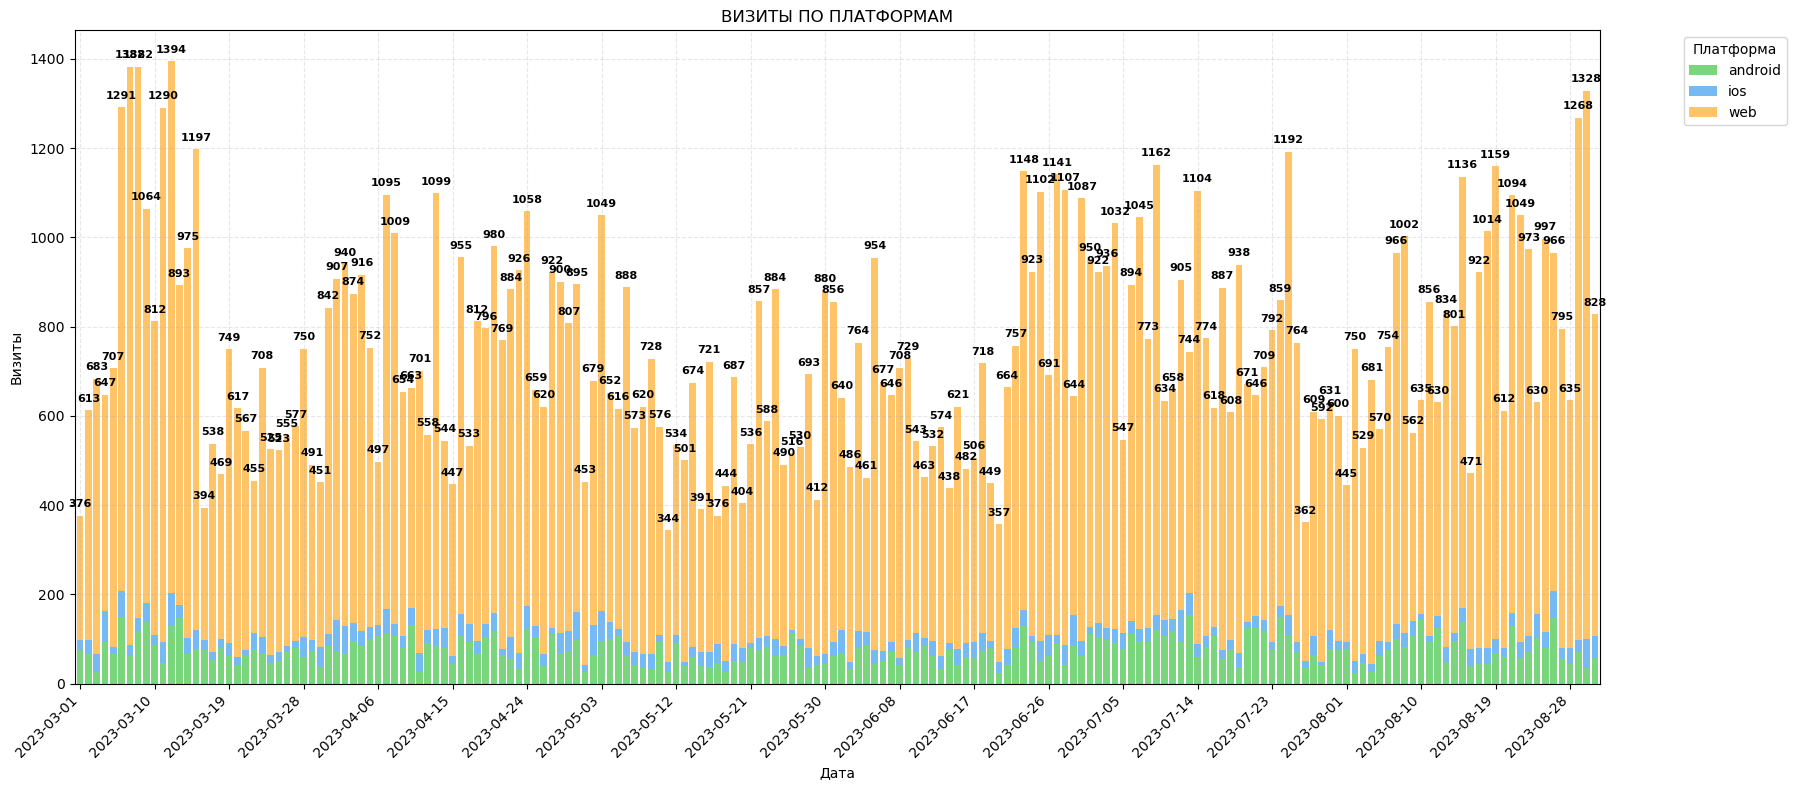

In [ ]:
# ГРАФИК ВИЗИТОВ ПО ПЛАТФОРМАМ
fig, ax = plt.subplots(figsize=(18, 8))

# Преобразуем данные
visits_pivot = visits_grouped.pivot(index='date_group', columns='platform', values='visits').fillna(0)
visits_pivot.index = pd.to_datetime(visits_pivot.index)
visits_pivot = visits_pivot.sort_index()

# ФИЛЬТРАЦИЯ ПО ДАТЕ - ИСПОЛЬЗУЕМ ПЕРЕМЕННЫЕ ОКРУЖЕНИЯ
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)
visits_pivot = visits_pivot[(visits_pivot.index >= filter_start_date) & (visits_pivot.index <= filter_end_date)]

# Проверяем, что есть данные после фильтрации
if visits_pivot.empty:
    print("Внимание: Нет данных для построения графика визитов по платформам")
else:
    # Строим столбчатую диаграмму
    # Проверяем наличие всех платформ
    available_platforms = []
    for platform in ['android', 'ios', 'web']:
        if platform in visits_pivot.columns:
            available_platforms.append(platform)
    
    if available_platforms:
        colors_dict = {"android": "#79D67C", "ios": "#75BAF3", "web": "#FFC368"}
        colors = [colors_dict[platform] for platform in available_platforms]
        
        visits_pivot[available_platforms].plot(kind='bar', stacked=True,
                                              color=colors,
                                              ax=ax, width=0.8)
        
        ax.set_title(f'ВИЗИТЫ ПО ПЛАТФОРМАМ')
        ax.set_ylabel('Визиты')
        ax.set_xlabel('Дата')
        
        step = max(1, len(visits_pivot) // 20)
        xticks_positions = list(range(0, len(visits_pivot), step))
        xticks_labels = [visits_pivot.index[i].strftime('%Y-%m-%d') for i in xticks_positions]
        
        ax.set_xticks(xticks_positions)
        ax.set_xticklabels(xticks_labels, rotation=45, ha='right')
        
        ax.legend(title='Платформа', bbox_to_anchor=(1.05, 1))
        ax.grid(True, axis='both', alpha=0.3, linestyle='--')
        
        # Добавляем подписи
        for i, (index, row) in enumerate(visits_pivot.iterrows()):
            total_visits = row.sum()
            
            ax.text(
                x=i,
                y=total_visits + (ax.get_ylim()[1] * 0.01),
                s=f'{int(total_visits)}',
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold'
            )
        
        fig.tight_layout()
        
        # Сохраняем и показываем график
        plt.savefig('./charts/total_visits_by_platform.png', dpi=300, bbox_inches='tight')
        plt.show()

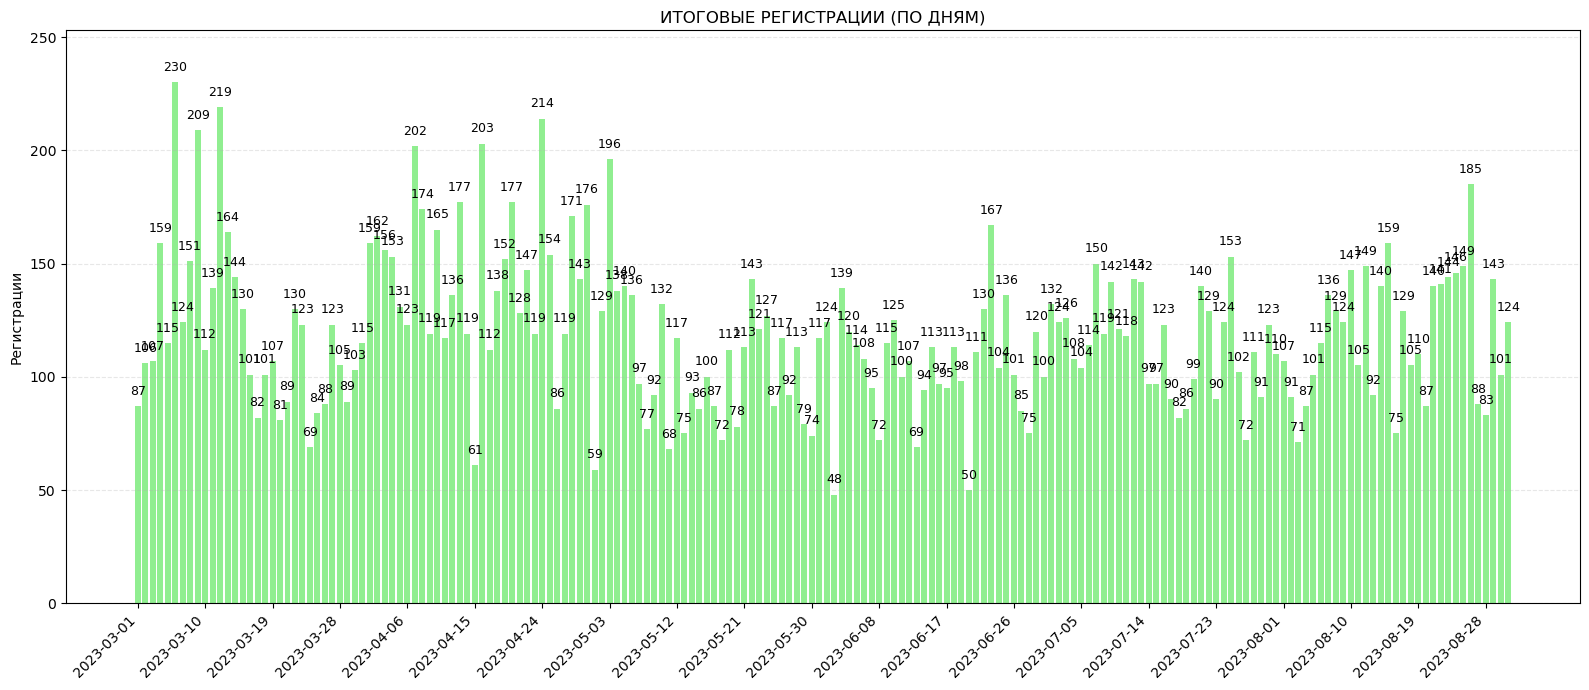

In [ ]:
# ГРАФИК ИТОГОВЫХ РЕГИСТРАЦИЙ
plt.figure(figsize=(16, 7))
ads_final['date_group_dt'] = pd.to_datetime(ads_final['date_group'], unit='ms')

# Фильтруем даты
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)

# Агрегируем регистрации по дням
daily_regs = ads_final.groupby('date_group_dt')['registrations'].sum().reset_index()

# Фильтруем по дате из переменных окружения
filtered_data = daily_regs[(daily_regs['date_group_dt'] >= filter_start_date) & 
                          (daily_regs['date_group_dt'] <= filter_end_date)].copy()

# Сортируем по дате
filtered_data = filtered_data.sort_values('date_group_dt')

# Форматируем даты для подписей
dates_formatted = filtered_data['date_group_dt'].dt.strftime('%Y-%m-%d')

# Проверяем, есть ли данные
if len(filtered_data) == 0:
    print("Внимание: Нет данных для построения графика регистраций")
else:
    # Строим столбчатую диаграмму
    bars = plt.bar(range(len(filtered_data)), filtered_data['registrations'], color='lightgreen')

    # Добавляем значения над столбцами
    for bar in bars: 
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
                f'{int(bar.get_height())}', ha='center', fontsize=9)

    plt.title(f'ИТОГОВЫЕ РЕГИСТРАЦИИ (ПО ДНЯМ)')
    plt.ylabel('Регистрации')

    # Настройка осей
    step = max(1, len(filtered_data) // 20)
    xticks_positions = list(range(0, len(filtered_data), step))
    xticks_labels = [dates_formatted.iloc[i] for i in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right')
    plt.ylim(0, filtered_data['registrations'].max() * 1.1)

    # Добавляем сетку
    plt.grid(True, axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()

    # Сохраняем и показываем график
    plt.savefig('./charts/total_registrations.png', dpi=300, bbox_inches='tight')
    plt.show()

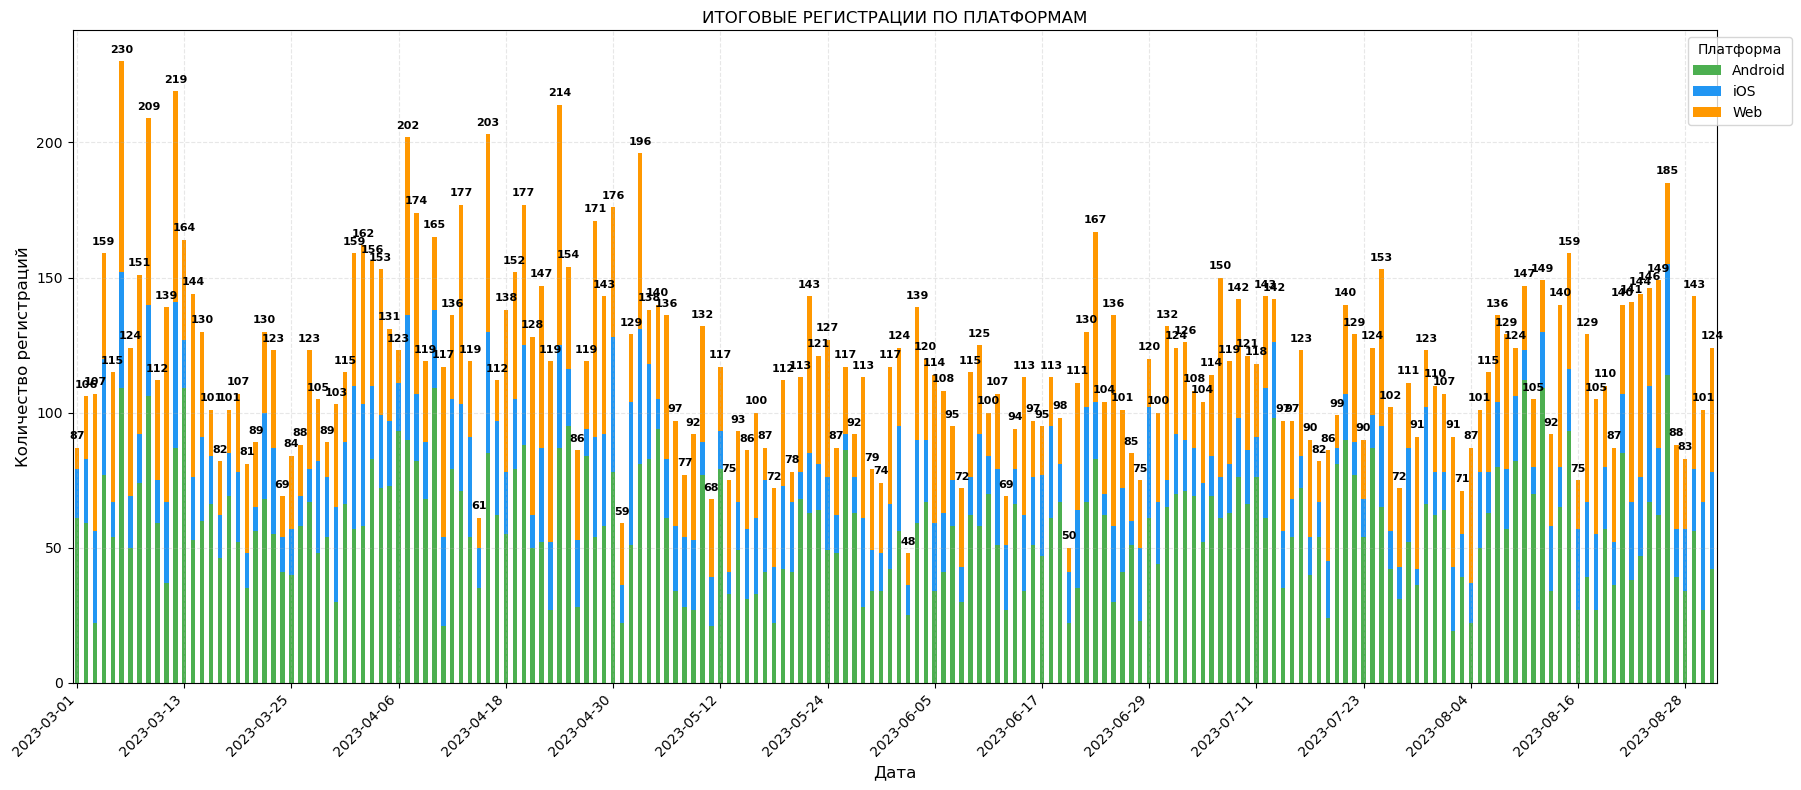

In [ ]:
# ГРАФИК РЕГИСТРАЦИЙ ПО ПЛАТФОРМАМ
fig, ax = plt.subplots(figsize=(18, 8))

# Преобразуем данные
regs_pivot = regs_grouped.pivot(index='date_group', columns='platform', values='registrations').fillna(0)
regs_pivot.index = pd.to_datetime(regs_pivot.index)

# Фильтруем по дате
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)
regs_pivot = regs_pivot[(regs_pivot.index >= filter_start_date) & (regs_pivot.index <= filter_end_date)]

# Проверяем, есть ли данные после фильтрации
if regs_pivot.empty:
    print("Внимание: Нет данных для построения графика регистраций по платформам")
else:
    # Строим график - проверяем наличие платформ
    available_platforms = []
    for platform in ['android', 'ios', 'web']:
        if platform in regs_pivot.columns:
            available_platforms.append(platform)
    
    if available_platforms:
        colors_dict = {'android': '#4CAF50', 'ios': '#2196F3', 'web': '#FF9800'}
        colors = [colors_dict[platform] for platform in available_platforms]
        
        regs_pivot[available_platforms].plot(kind='bar', stacked=True,
                                             color=colors, ax=ax)

        step = max(1, len(regs_pivot) // 15)
        xticks = range(0, len(regs_pivot), step)
        ax.set_xticks(xticks)
        ax.set_xticklabels([regs_pivot.index[i].strftime('%Y-%m-%d') for i in xticks], rotation=45, ha='right')

        # Делаем подписи
        ax.set_title(f'ИТОГОВЫЕ РЕГИСТРАЦИИ ПО ПЛАТФОРМАМ')
        ax.set_ylabel('Количество регистраций', fontsize=12)
        ax.set_xlabel('Дата', fontsize=12)
        
        handles, labels = ax.get_legend_handles_labels()
        platform_names = {
            'android': 'Android',
            'ios': 'iOS',
            'web': 'Web'
        }
        labels = [platform_names.get(label, label) for label in labels]
        ax.legend(handles, labels, title='Платформа', bbox_to_anchor=(1.05, 1))

        # Добавляем сетку
        plt.grid(True, axis='both', alpha=0.3, linestyle='--')

        # Добавляем подписи
        for i, (index, row) in enumerate(regs_pivot.iterrows()):
            total_regs = row.sum()
            
            ax.text(
                x=i,
                y=total_regs + (ax.get_ylim()[1] * 0.01),
                s=f'{int(total_regs)}',
                ha='center',
                va='bottom',
                fontsize=8,
                color='black',
                fontweight='bold'
            )

        plt.tight_layout()

        # Сохраняем и показываем график
        plt.savefig('./charts/total_registrations_by_platform.png', bbox_inches='tight', dpi=300)
        plt.show()

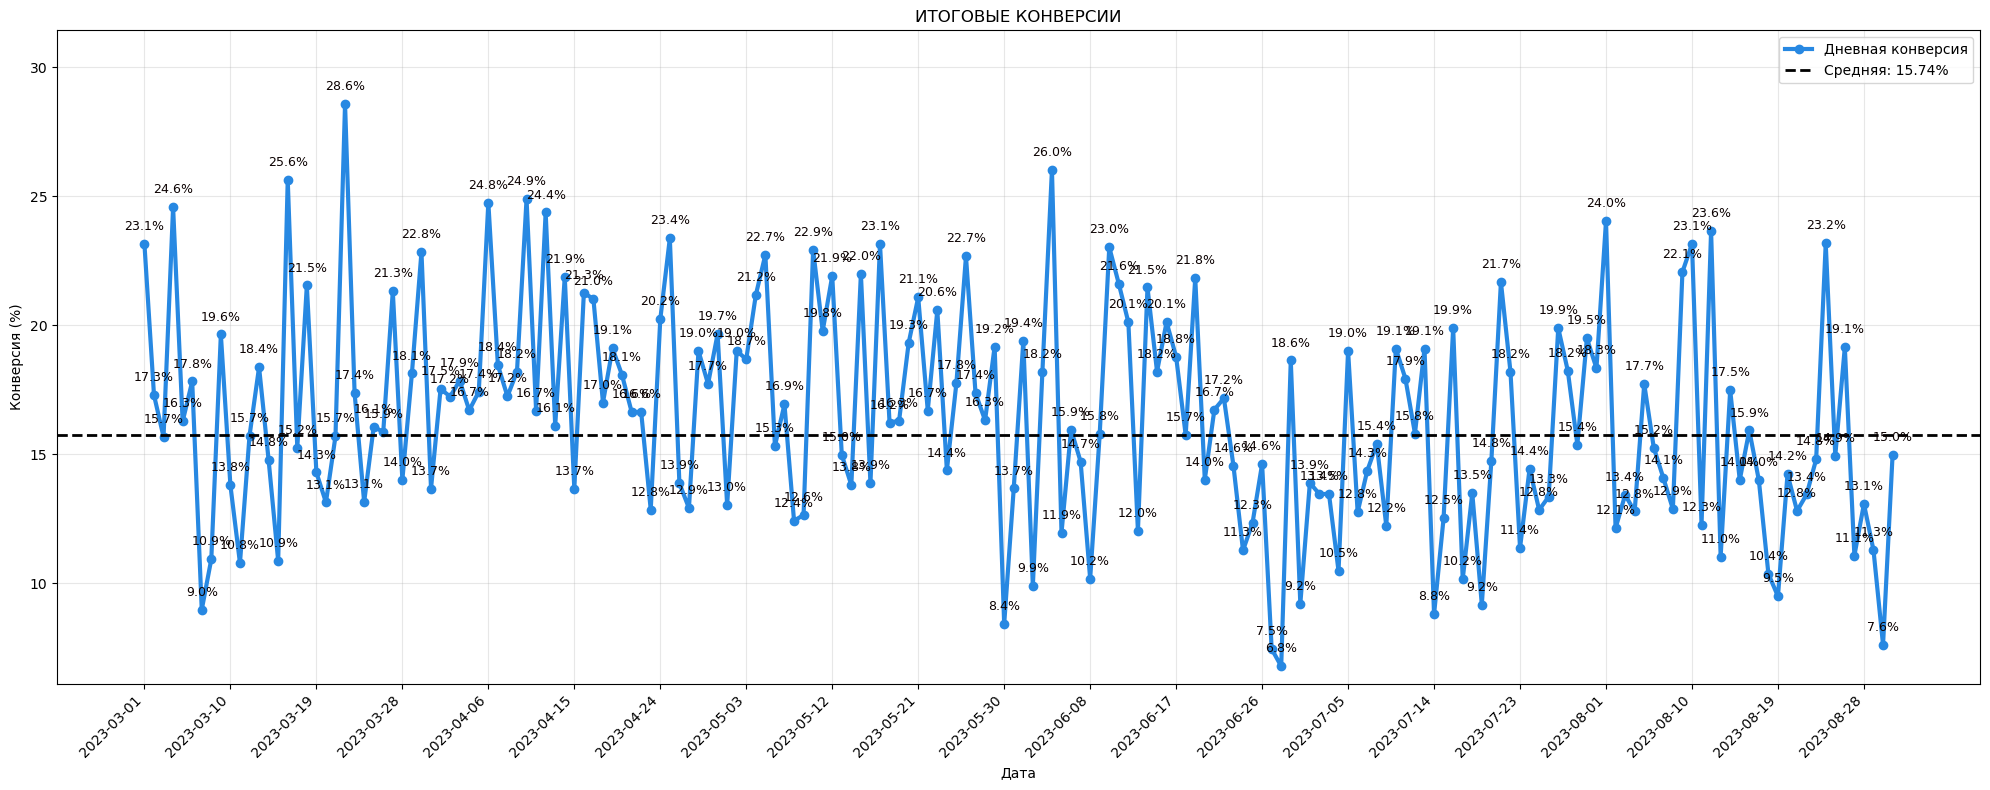

In [179]:
# ГРАФИК ИТОГОВЫХ КОНВЕРСИЙ

fig, ax = plt.subplots(figsize=(20, 8))
ads_final['date_normal'] = pd.to_datetime(ads_final['date_group'], unit='ms')

# Фильтруем по дате
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)

# Агрегируем данные по дням
daily_data = ads_final.groupby('date_normal').agg({
    'visits': 'sum',
    'registrations': 'sum'
}).reset_index()

# Фильтруем по дате из переменных окружения
filtered_data = daily_data[(daily_data['date_normal'] >= filter_start_date) & 
                          (daily_data['date_normal'] <= filter_end_date)].copy()

# Проверяем, есть ли данные
if len(filtered_data) == 0:
    print("Внимание: Нет данных для построения графика конверсий")
else:
    # Рассчитываем конверсию
    filtered_data['conversion'] = filtered_data.apply(
        lambda row: round(row['registrations'] / row['visits'] * 100, 2) 
        if row['visits'] > 0 else 0,
        axis=1
    )

    # Сортируем по дате
    filtered_data = filtered_data.sort_values('date_normal')

    # Убираем возможные NaN/Inf значения
    filtered_data = filtered_data.dropna(subset=['conversion'])
    filtered_data = filtered_data[np.isfinite(filtered_data['conversion'])]

    dates = filtered_data['date_normal'].dt.strftime('%Y-%m-%d')
    x_pos = range(len(filtered_data))

    # Строим график
    ax.plot(x_pos, filtered_data['conversion'], color="#2788E2", linewidth=3, 
            marker='o', markersize=6, label='Дневная конверсия')

    # Добавляем аннотации
    for pos, conv in zip(x_pos, filtered_data['conversion']):
        ax.annotate(f'{conv:.1f}%', xy=(pos, conv), xytext=(0, 10), 
                    textcoords='offset points', ha='center', fontsize=9, color="#0B0101")

    # Добавляем среднюю линию
    total_visits = filtered_data['visits'].sum()
    total_regs = filtered_data['registrations'].sum()
    overall_conv = round(total_regs / total_visits * 100, 2) if total_visits > 0 else 0

    ax.axhline(y=overall_conv, color="#000000", linestyle='--', linewidth=2, 
               label=f'Средняя: {overall_conv}%')

    # Настройка осей X
    step = max(1, len(filtered_data) // 20)
    xticks = list(range(0, len(filtered_data), step))
    ax.set_xticks(xticks)
    ax.set_xticklabels([dates.iloc[i] for i in xticks], rotation=45, ha='right')

    # Добавляем заголовки
    ax.set_title(f'ИТОГОВЫЕ КОНВЕРСИИ')
    ax.set_ylabel('Конверсия (%)')
    ax.set_xlabel('Дата')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

    # Устанавливаем пределы оси Y с проверкой
    if len(filtered_data) > 0:
        y_min = max(0, filtered_data['conversion'].min() * 0.9)
        y_max = filtered_data['conversion'].max() * 1.1
        ax.set_ylim(y_min, y_max)
    else:
        ax.set_ylim(0, 100)

    plt.tight_layout()

    # Сохраняем и показываем график
    plt.savefig('./charts/total_conversion.png', dpi=300, bbox_inches='tight')
    plt.show()

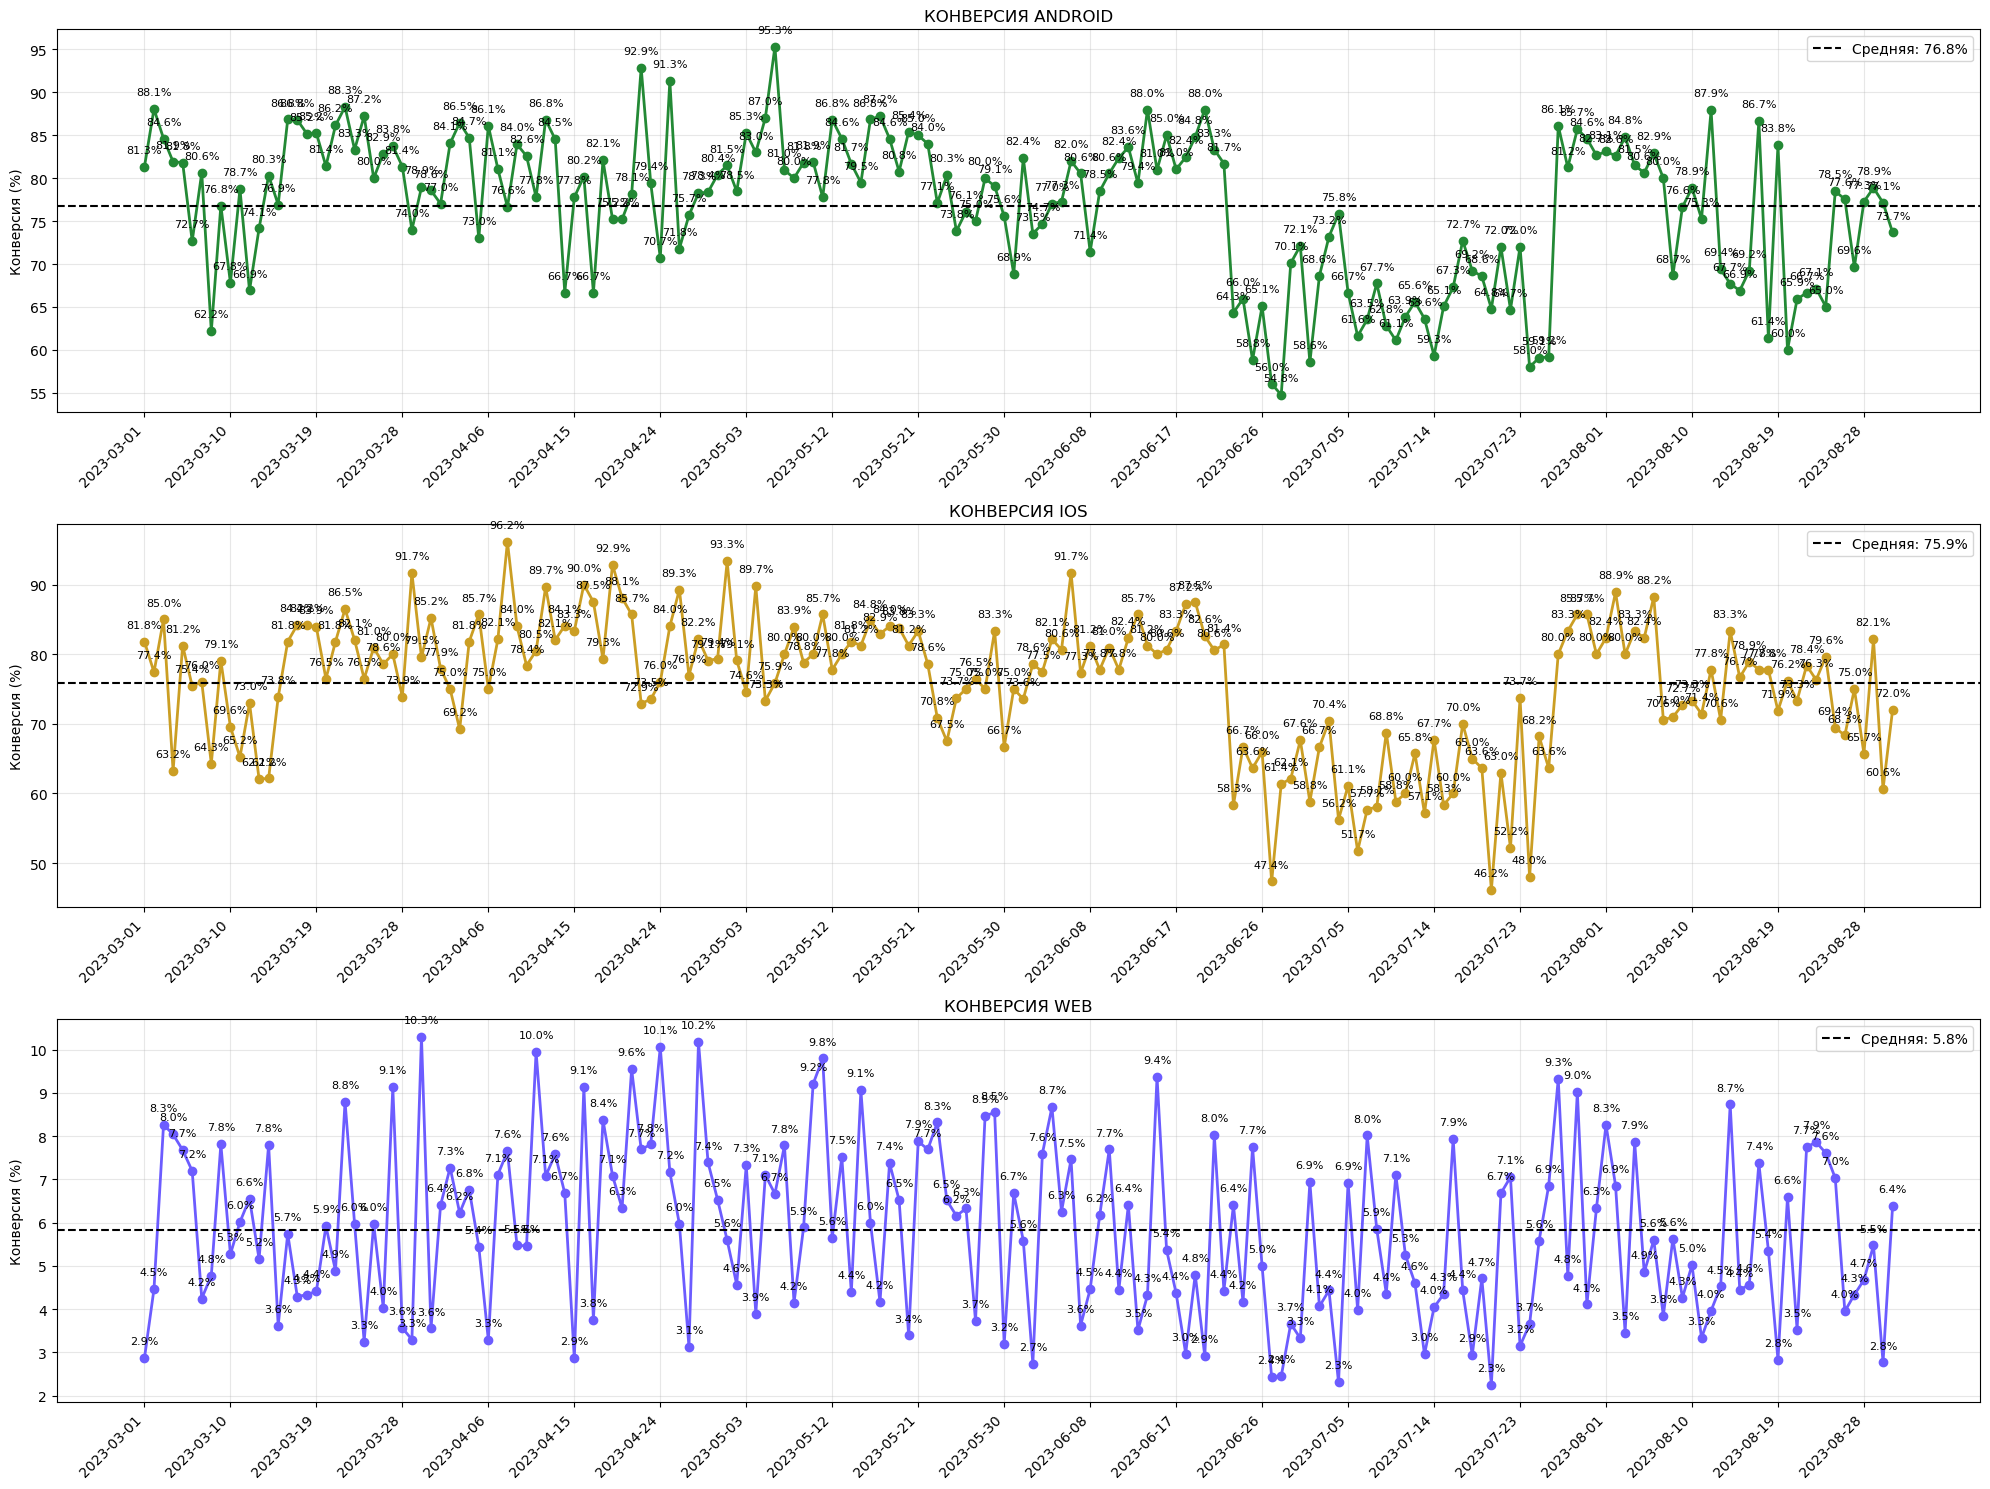

In [ ]:
# ГРАФИК КОНВЕРСИЙ ПО ПЛАТФОРМАМ
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
step = 3
platform_data = final_df.copy()

# Преобразуем date_group в datetime для фильтрации
platform_data['date_group_dt'] = pd.to_datetime(platform_data['date_group'], unit='ms')

# Фильтруем по дате
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)
platform_data = platform_data[
    (platform_data['date_group_dt'] >= filter_start_date) & 
    (platform_data['date_group_dt'] <= filter_end_date)
].copy()

# Проверяем, есть ли данные
if platform_data.empty:
    print("Внимание: Нет данных для построения графика конверсий по платформам")
else:
    for idx, platform in enumerate(['android', 'ios', 'web']):
        ax = axes[idx]
        platform_df = platform_data.query('platform == @platform').sort_values('date_group_dt')
        
        if platform_df.empty:
            ax.text(0.5, 0.5, f'Нет данных для {platform.upper()}', 
                    ha='center', va='center', transform=ax.transAxes, fontsize=14)
            ax.set_title(f'КОНВЕРСИЯ {platform.upper()} (нет данных)')
            continue
            
        x_positions = range(len(platform_df))
        dates = platform_df['date_group_dt'].dt.strftime('%Y-%m-%d')
        
        ax.plot(x_positions, platform_df['conversion'],
                color=["#238935", "#CB9E24", "#6C5CFF"][idx], linewidth=2, marker='o')
        
        # Подписи точек
        for i, (pos, conv) in enumerate(zip(x_positions, platform_df['conversion'])):
            ax.annotate(f'{conv:.1f}%', xy=(pos, conv), xytext=(0, 10),
                        textcoords='offset points', ha='center', fontsize=8)
        
        # Средняя линия
        ax.axhline(y=platform_df['conversion'].mean(), color='black', linestyle='--',
                   label=f'Средняя: {platform_df["conversion"].mean():.1f}%')
        
        # Шаг дат
        step = max(1, len(platform_df) // 20)
        xticks = list(range(0, len(platform_df), step))
        ax.set_xticks(xticks)
        ax.set_xticklabels([dates.iloc[i] for i in xticks], rotation=45, ha='right')
        
        ax.set_title(f'КОНВЕРСИЯ {platform.upper()}')
        ax.set_ylabel('Конверсия (%)')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()

    # Сохраняем и показываем график
    plt.savefig('./charts/total_conversion_by_platform.png', dpi=300, bbox_inches='tight')
    plt.show()

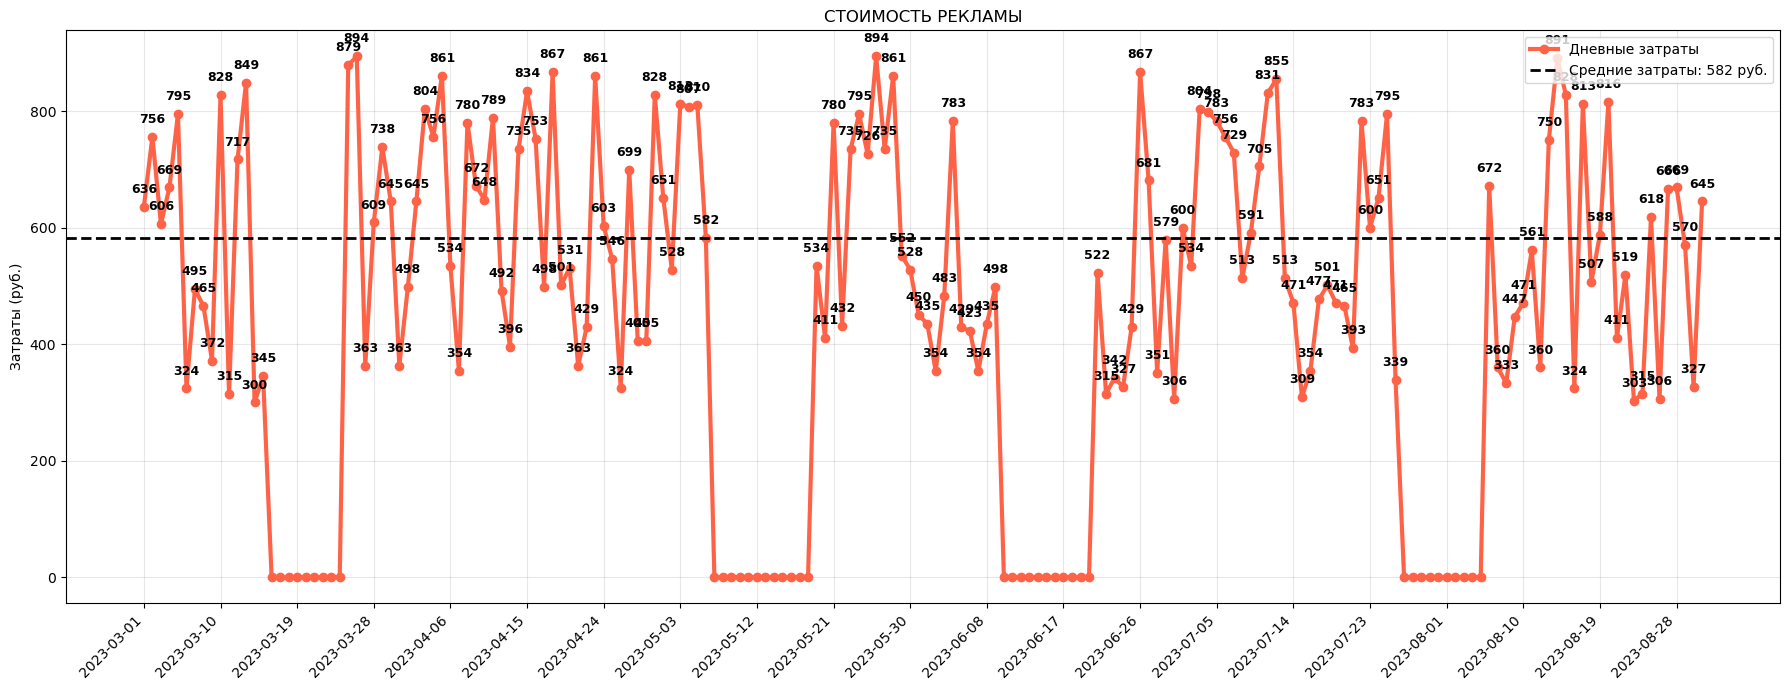

In [ ]:
# ГРАФИК СТОИМОСТИ РЕКЛАМЫ
plt.figure(figsize=(18, 7))

# Преобразуем даты
ads_final['date_group_dt'] = pd.to_datetime(ads_final['date_group'], unit='ms')

# Фильтруем по дате
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)
filtered_ads = ads_final[(ads_final['date_group_dt'] >= filter_start_date) & 
                        (ads_final['date_group_dt'] <= filter_end_date)].copy()

# Проверяем, есть ли данные
if filtered_ads.empty:
    print("Внимание: Нет данных для построения графика стоимости рекламы")
else:
    # Агрегируем затраты по дням
    daily_costs = filtered_ads.groupby('date_group_dt')['cost'].sum().reset_index()

    # Сортируем по дате
    daily_costs = daily_costs.sort_values('date_group_dt')

    # Форматируем даты
    dates_formatted = daily_costs['date_group_dt'].dt.strftime('%Y-%m-%d')
    x_positions = range(len(daily_costs))

    # Строим график
    plt.plot(x_positions, daily_costs['cost'],
             color='tomato',
             linewidth=3,
             marker='o',
             markersize=6,
             label='Дневные затраты')

    # Добавляем подписи
    for pos, cost in zip(x_positions, daily_costs['cost']):
        if cost > 0:
            plt.annotate(f'{int(cost)}',
                         xy=(pos, cost),
                         xytext=(0, 10),
                         textcoords='offset points',
                         ha='center',
                         fontsize=9,
                         fontweight='bold',
                         color='black')

    # Добавляем среднюю линию
    days_with_cost = daily_costs[daily_costs['cost'] > 0]
    if len(days_with_cost) > 0:
        avg_cost = days_with_cost['cost'].mean()
        plt.axhline(y=avg_cost, color='black', linestyle='--', linewidth=2,
                   label=f'Средние затраты: {avg_cost:.0f} руб.')

    # Настраиваем оформление графика
    plt.title(f'СТОИМОСТЬ РЕКЛАМЫ')
    plt.ylabel('Затраты (руб.)')

    # Устанавливаем шаг
    step = max(1, len(daily_costs) // 20)
    xticks_positions = list(range(0, len(daily_costs), step))
    xticks_labels = [dates_formatted.iloc[i] for i in xticks_positions]

    plt.xticks(xticks_positions, xticks_labels, rotation=45, ha='right')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Сохраняем и показываем график
    plt.savefig('./charts/campaigns_cost_by_date.png', dpi=300, bbox_inches='tight')
    plt.show()

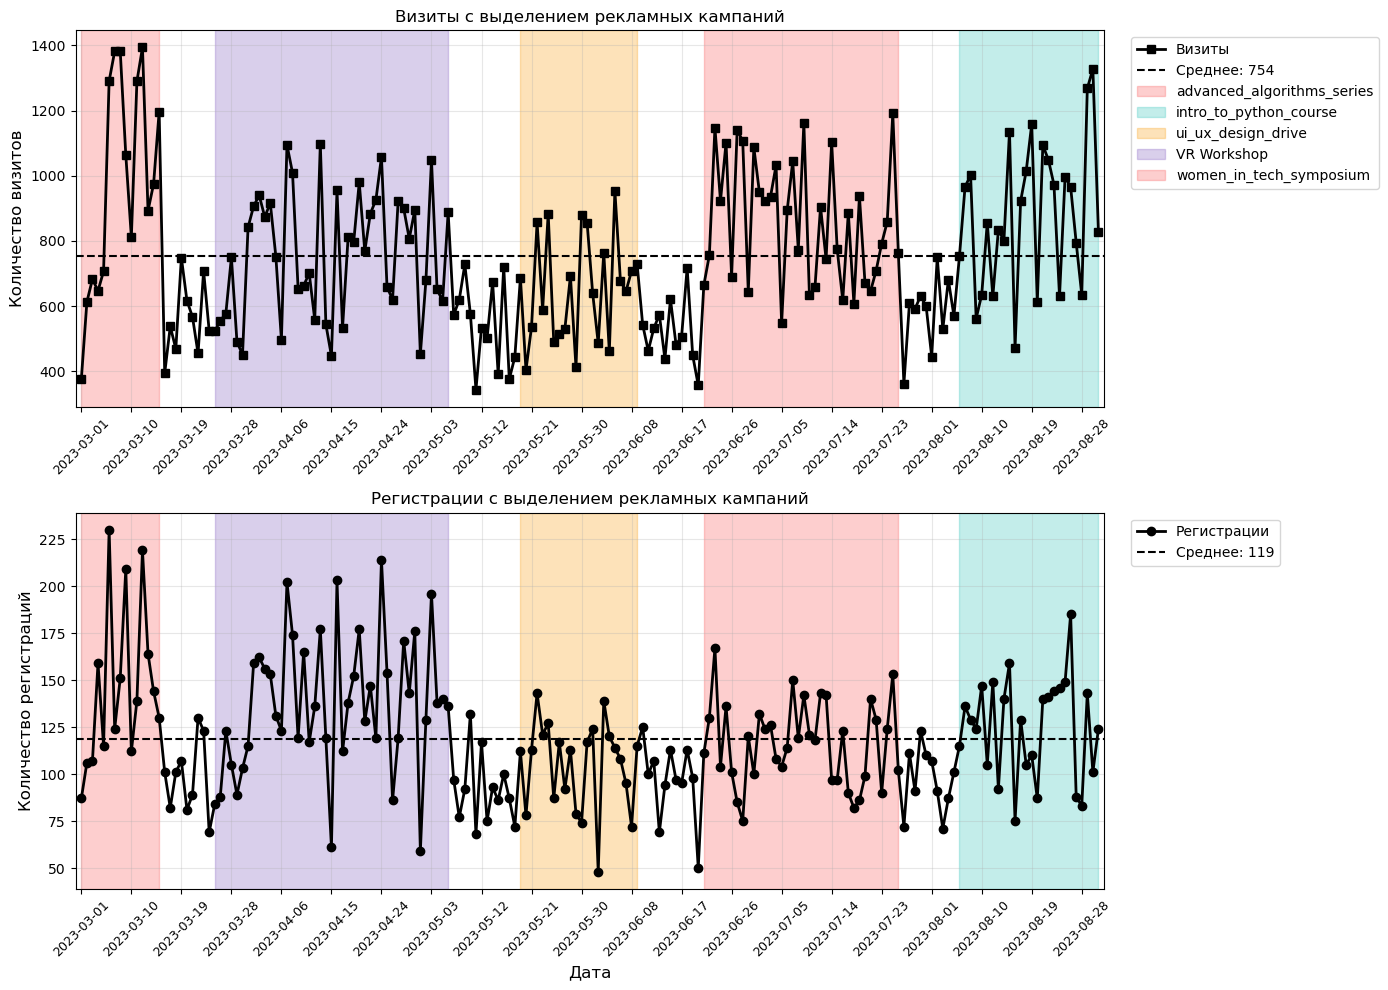

In [184]:
# ДВОЙНОЙ ГРАФИК С РЕКЛАМНЫМИ КАМПАНИЯМИ
ads_final['date_group_dt'] = pd.to_datetime(ads_final['date_group'], unit='ms')

# Фильтруем по дате
filter_start_date = pd.Timestamp(DATE_BEGIN)
filter_end_date = pd.Timestamp(DATE_END)
filtered_ads = ads_final[(ads_final['date_group_dt'] >= filter_start_date) & 
                        (ads_final['date_group_dt'] <= filter_end_date)].copy()

# Проверяем, есть ли данные
if filtered_ads.empty:
    print("Внимание: Нет данных для построения двойного графика")
else:
    # Сортируем по дате
    filtered_ads = filtered_ads.sort_values('date_group_dt')

    # Агрегируем данные по дням
    daily_data = filtered_ads.groupby('date_group_dt').agg({
        'visits': 'sum',
        'registrations': 'sum',
        'utm_campaign': 'first',
        'cost': 'sum'
    }).reset_index()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # ВЕРХНИЙ ГРАФИК - ВИЗИТЫ
    ax1.plot(daily_data['date_group_dt'], daily_data['visits'],
             marker='s', color="#000000", linewidth=2, label='Визиты')
    ax1.set_title(f'Визиты с выделением рекламных кампаний')
    ax1.set_ylabel('Количество визитов', fontsize=12)
    ax1.grid(True, alpha=0.3)

    # Средняя линия для визитов
    avg_visits = daily_data['visits'].mean()
    ax1.axhline(avg_visits, color='black', linestyle='--',
               label=f'Среднее: {avg_visits:.0f}')

    # НИЖНИЙ ГРАФИК - РЕГИСТРАЦИИ
    ax2.plot(daily_data['date_group_dt'], daily_data['registrations'],
             marker='o', color="#000000", linewidth=2, label='Регистрации')
    ax2.set_title('Регистрации с выделением рекламных кампаний')
    ax2.set_ylabel('Количество регистраций', fontsize=12)
    ax2.set_xlabel('Дата', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Средняя линия для регистраций
    avg_reg = daily_data['registrations'].mean()
    ax2.axhline(avg_reg, color='black', linestyle='--',
               label=f'Среднее: {avg_reg:.0f}')

    if 'utm_campaign' in daily_data.columns:
        # Фильтруем дни с кампаниями
        campaign_days = daily_data[daily_data['utm_campaign'].notna() &
                                 (daily_data['utm_campaign'] != 'none')]
        
        if not campaign_days.empty:
            # Группируем по кампаниям
            campaign_groups = campaign_days.groupby('utm_campaign')
            
            colors = ["#FA5D5D", "#3AC5BC", "#FAA017", "#8461C0"]
            
            # Выделяем каждую кампанию
            for idx, (campaign_name, group) in enumerate(campaign_groups):
                start_date_campaign = group['date_group_dt'].min()
                end_date_campaign = group['date_group_dt'].max()
                
                if 'virtual_reality' in str(campaign_name).lower():
                    label = 'VR Workshop'
                elif 'game_dev' in str(campaign_name).lower():
                    label = 'Game Dev Course'
                else:
                    label = campaign_name
                
                color = colors[idx % len(colors)]
                ax1.axvspan(start_date_campaign, end_date_campaign, color=color, alpha=0.3, label=label)
                ax2.axvspan(start_date_campaign, end_date_campaign, color=color, alpha=0.3)

    # Настраиваем даты
    num_days = len(daily_data)
    interval = max(1, num_days // 20)

    locator = mdates.DayLocator(interval=interval)
    formatter = mdates.DateFormatter('%Y-%m-%d')

    # Для верхнего графика
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)
    ax1.tick_params(axis='x', labelbottom=True, rotation=45, labelsize=9)

    # Для нижнего графика
    ax2.xaxis.set_major_locator(locator)
    ax2.xaxis.set_major_formatter(formatter)
    ax2.tick_params(axis='x', rotation=45, labelsize=9)

    x_min = daily_data['date_group_dt'].min() - pd.Timedelta(days=1)
    x_max = daily_data['date_group_dt'].max() + pd.Timedelta(days=1)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    ax1.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1))
    ax2.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1))

    plt.tight_layout()

    # Сохраняем и показываем
    plt.savefig('./charts/visits_registrations_with_campaigns.png', dpi=300, bbox_inches='tight')
    plt.show()